# EPOCH Week3 D팀 TASK (4기 박정민) (데싸노트의 실전에서 통하는 머신러닝)

## CH7.나이브 베이즈 : 스팸 여부 판단하기 (p.210 ~ p.244)

### 나이브 베이즈 소개
- 베이즈 정리를 적용한 조건부 확률 기반의 분류모델
- 장점 : 간단하다, 작은 훈련셋으로도 잘 예측한다
- 단점 : 모든 독립변수가 i.i.d. 즉, 독립적이다.

### 7.2 라이브러리 및 데이터 불러오기 & 데이터 확인


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data = pd.read_csv(file)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

- 목표 변수의 고유값이 ham, spam만 존재한다.


### 7.3 전처리 : 특수 기호 제거하기

In [ ]:
import string

In [ ]:
string.punctuation # 특수 기호 목록 출력

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
sample_string = data['text'].loc[0] # 첫째 행?
sample_string

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
for i in sample_string:  # 문자 하나하나씩 출력
  print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [ ]:
for i in sample_string:   # 문자 하나하나씩
  if i not in string.punctuation:  # 특수문자가 아닐 때 출력
    print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [ ]:
new_string = []
for i in sample_string:
  if i not in string.punctuation:
    new_string.append(i)  # 문자를 리스트에 저장

In [ ]:
new_string

['G',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'A',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'u',
 'g',
 'i',
 's',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'l',
 'a',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 't',
 ' ',
 'C',
 'i',
 'n',
 'e',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'a',
 'm',
 'o',
 'r',
 'e',
 ' ',
 'w',
 'a',
 't']

In [ ]:
# 리스트는 지금 어떤 형태인가?
np.shape(new_string) # 102개의 문자가 각각 행으로 들어가 있는 상태

(102,)

In [ ]:
new_string = []
for i in sample_string:
  if i not in string.punctuation:
    new_string.append(i)
new_string = ''.join(new_string)  # 리스트를 문자열 형태로 변환
new_string

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [ ]:
def remove_punc(x):  # 위의 과정을 하나의 함수로 저장
  new_string = []
  for i in x:
    if i not in string.punctuation:
      new_string.append(i)
  new_string = ''.join(new_string)
  return new_string

In [ ]:
remove_punc(sample_string) # sample_string 즉, 첫 행을 위의 함수에 적용

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [ ]:
remove_punc(data['text'])

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sU dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcvEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitl

- 위의 함수는 하나의 행에만 적용이 되도록 설계되어있으므로, 따로 해결하자.

In [ ]:
data['text'].apply(remove_punc)

,text
0,Go until jurong point crazy Available only in ...
1,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor U c already then say
4,Nah I dont think he goes to usf he lives aroun...
...,...
5569,This is the 2nd time we have tried 2 contact u...
5570,Will ü b going to esplanade fr home
5571,Pity was in mood for that Soany other suggest...
5572,The guy did some bitching but I acted like id ...


In [ ]:
data['text'] = data['text'].apply(remove_punc) # 특수문자를 제거하여 업데이트

### 7.4 전처리 : 불용어 제거하기

- 불용어 : 조사나 부사같은 데이터 분석에 필요없는 단어

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english') # english언어의 불용어들

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
from nltk.corpus import stopwords
print(stopwords.fileids()) # 총 24개의 언어가 nltk에 있다. (한국어는 없음)

['albanian', 'arabic', 'azerbaijani', 'basque', 'belarusian', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'tamil', 'turkish']


In [ ]:
sample_string = data['text'].loc[0]
sample_string.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [ ]:
for i in sample_string.split():
  if i not in stopwords.words('english'):  # 불용어 제거
    print(i)

Go
jurong
point
crazy
Available
bugis
n
great
world
la
e
buffet
Cine
got
amore
wat


In [ ]:
for i in sample_string.split():
  if i.lower() not in stopwords.words('english'): # lower를 이용하여 모두 소문자로 바꿈
    print(i.lower())

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


In [ ]:
new_string = []
for i in sample_string.split():
  if i.lower() not in stopwords.words('english'):
    new_string.append(i.lower())

new_string = ' '.join(new_string)
new_string

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [ ]:
def stop_words(x):
  new_string = []
  for i in x.split():
    if i.lower() not in stopwords.words('english'):
      new_string.append(i.lower())
  new_string = ' '.join(new_string)
  return new_string

data['text'] = data['text'].apply(stop_words)
data['text']

,text
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say
4,nah dont think goes usf lives around though
...,...
5569,2nd time tried 2 contact u u £750 pound prize ...
5570,ü b going esplanade fr home
5571,pity mood soany suggestions
5572,guy bitching acted like id interested buying s...


### 7.5 전처리 : 목표 컬럼 형태 변경하기

In [ ]:
data['target'] = data['target'].map({'spam' : 1, 'ham' : 0})  # 목표변수의 고유값을 map을 이용하여 변환
data['target']

,target
0,0
1,0
2,1
3,0
4,0
...,...
5569,1
5570,0
5571,0
5572,0


### 7.6 전처리 : 카운트 기반으로 벡터화하기

In [ ]:
x = data['text']
y = data['target']
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(x)
cv.vocabulary_

{'go': 3791,
 'jurong': 4687,
 'point': 6433,
 'crazy': 2497,
 'available': 1414,
 'bugis': 1881,
 'great': 3888,
 'world': 9184,
 'la': 4847,
 'buffet': 1879,
 'cine': 2214,
 'got': 3848,
 'amore': 1181,
 'wat': 8947,
 'ok': 5995,
 'lar': 4886,
 'joking': 4655,
 'wif': 9079,
 'oni': 6027,
 'free': 3577,
 'entry': 3160,
 'wkly': 9136,
 'comp': 2330,
 'win': 9093,
 'fa': 3296,
 'cup': 2553,
 'final': 3421,
 'tkts': 8380,
 '21st': 454,
 'may': 5335,
 '2005': 441,
 'text': 8217,
 '87121': 875,
 'receive': 6833,
 'questionstd': 6724,
 'txt': 8592,
 'ratetcs': 6776,
 'apply': 1267,
 '08452810075over18s': 71,
 'dun': 3011,
 'say': 7192,
 'early': 3031,
 'hor': 4222,
 'already': 1154,
 'nah': 5682,
 'dont': 2918,
 'think': 8291,
 'goes': 3805,
 'usf': 8741,
 'lives': 5050,
 'around': 1318,
 'though': 8310,
 'freemsg': 3585,
 'hey': 4118,
 'darling': 2617,
 'weeks': 9002,
 'word': 9170,
 'back': 1464,
 'id': 4343,
 'like': 5000,
 'fun': 3652,
 'still': 7860,
 'tb': 8147,
 'xxx': 9309,
 'std': 

In [ ]:
x = cv.transform(x)
print(x)    # 행번호, 단어의 인덱스 값, 행에서 출현한 횟수를 추출

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 47493 stored elements and shape (5574, 9437)>
  Coords	Values
  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


In [ ]:
data.loc[0]['text']

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [ ]:
print(cv.vocabulary_['go'])         # go는 3791 인덱스
print(cv.vocabulary_['jurong'])     # go는 4687 인덱스
print(cv.vocabulary_['point'])      # go는 6433 인덱스

3791
4687
6433


### 7.7 모델링 및 예측/평가하기

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 100)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, pred)

0.9856502242152466

In [ ]:
print(confusion_matrix(y_test, pred))

[[965  12]
 [  4 134]]


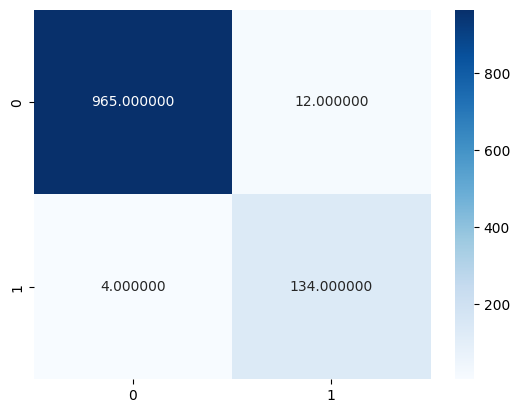

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='0f', cmap='Blues')
plt.show()

- 스팸문자의 경우 스팸이 아닌 문자(중요한 문자일수도..)를 스팸으로 분류하는 1종오류를 조심해야한다.
- 즉, 1종 오류의 값을 줄이는데에 초점을 맞춰 cutoff값을 정하는게 좋다.
- 현재 1종 오류의 값이 12개, 2종오류의 값이 4개이다.

### 과제 : GaussianNB, BernoulliNB(binarize=True) 비교

In [ ]:
# 가우시안 사용
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train.toarray(), y_train)
pred = model.predict(x_test.toarray())
accuracy_score(y_test, pred)

0.8941704035874439

In [ ]:
# 베르누이 NB 사용
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(binarize=True)
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.8762331838565023

## CH8.결정 트리 : 연봉 예측하기 (p.245 ~ p.288)

- 트리모델은 분류해가면 예측 모델을 만들어간다.
- 장점 : 가정이 없다, 아웃라이어의 영향을 거의 안 받는다, 시각화가 매우 띄어나다.
- 단점 : 무한정 깊어지면 과적합 문제를 야기할 수 있다, 예측력이 상당히 떨어진다.


### 8.2 라이브러리 및 데이터 불러오기, 데이터 확인하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
data = pd.read_csv(file, skipinitialspace = True)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data['class'].unique()  # 목표변수 고유값 확인

array(['<=50K', '>50K'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [ ]:
data.isna().sum()

,0
age,0
workclass,2799
education,0
education-num,0
marital-status,0
occupation,2809
relationship,0
race,0
sex,0
capital-gain,0


In [ ]:
# 데이터타입이 object인 변수도 통계량 출력
data.describe(include = 'all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### 8.3 전처리 : 범주형 데이터

In [ ]:
data['class']  # 목표변수 데이터 확인하기

,class
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [ ]:
data['class'] = data['class'].map({'<=50K' : 0, '>50K' : 1})  # map을 이용하여 숫자로 변환
data['class']

,class
0,0
1,0
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,0
48840,0


In [ ]:
# 8.3.1 object형의 변수 정보 확인하기
data['age'].dtype

dtype('int64')

In [ ]:
# 각 컬럼별 dtype을 반복문을 활용하여 출력
for i in data.columns:
  print(i, data[i].dtype)

age int64
workclass object
education object
education-num int64
marital-status object
occupation object
relationship object
race object
sex object
capital-gain int64
capital-loss int64
hours-per-week int64
native-country object
class int64


In [ ]:
# object타입인 변수 이름을 별도로 모으기
obj_list = []
for i in data.columns:
  if data[i].dtype == 'object':
    obj_list.append(i)
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [ ]:
# 8.3.2 전처리할 변수 선별하기
# obj_list에 존재하는 각 변수의 고유값 갯수 확인
for i in obj_list:
  print(i, data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


In [ ]:
# 고유값이 10개 이상인 변수들만 추출

for i in obj_list:
  if data[i].nunique() >= 10:
    print(i, data[i].nunique())

education 16
occupation 14
native-country 41


In [ ]:
# 8.3.3 education 변수 처리
data['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [ ]:
np.sort(data['education-num'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
data['education-num'] == 1

,education-num
0,False
1,False
2,False
3,False
4,False
...,...
48837,False
48838,False
48839,False
48840,False


In [ ]:
# education-num이 1인 행만 추출
data[data['education-num'] == 1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [ ]:
# education-num이 1인 education 고유값 확인
data[data['education-num'] == 1]['education'].unique()

array(['Preschool'], dtype=object)

In [ ]:
# education-num의 모든 숫자 확인하기
for i in np.sort(data['education-num'].unique()):
  print(i, data[data['education-num'] == i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [ ]:
# 이미 정렬이 되어있으니 'education' 변수 제거
data.drop('education', axis = 1, inplace=True)

In [ ]:
# 8.3.4 occupation 변수 처리
data['occupation'].value_counts()

# 이미 비슷한 직군끼리 묶여 있기에 따로 처리할 필요 없음

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [ ]:
# 8.3.5 native-country 변수 처리
data['native-country'].value_counts()

# 미국 데이터값만 많고 다른 것이 작기에 처리해보자.

,count
native-country,
United-States,43832
Mexico,951
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


In [ ]:
data.groupby('native-country').mean(numeric_only=True)

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Cambodia,36.892857,9.392857,697.464286,194.821429,42.035714,0.321429
Canada,44.049451,10.692308,1233.505495,131.159341,40.406593,0.346154
China,41.852459,11.262295,1407.737705,170.655738,38.262295,0.295082
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Cuba,46.355072,9.391304,470.543478,62.717391,40.101449,0.246377
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Ecuador,37.666667,9.244444,328.288889,0.000000,39.266667,0.133333
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
England,40.527559,11.110236,1076.551181,108.913386,41.937008,0.370079


In [ ]:
data.groupby('native-country').mean(numeric_only=True).sort_values('class')

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


In [ ]:
country_group = data.groupby('native-country').mean(numeric_only=True)['class']
country_group

,class
native-country,
Cambodia,0.321429
Canada,0.346154
China,0.295082
Columbia,0.047059
Cuba,0.246377
Dominican-Republic,0.048544
Ecuador,0.133333
El-Salvador,0.070968
England,0.370079


In [ ]:
country_group = country_group.reset_index()
country_group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [ ]:
data1 = data.merge(country_group, on ='native-country', how = 'left')
data1

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


In [ ]:
data2 = data1.drop('native-country', axis = 1)
data2 = data2.rename(columns = {'class_x' : 'class', 'class_y' : 'native-country'})
data2

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,0.243977


### 8.4 전처리 : 결측치 처리 및 더미 변수 변환

In [ ]:
data_raw = data
data = data2     # 업데이트

In [ ]:
data.isna().mean()

,0
age,0.000000
workclass,0.057307
education-num,0.000000
marital-status,0.000000
occupation,0.057512
relationship,0.000000
race,0.000000
sex,0.000000
capital-gain,0.000000
capital-loss,0.000000


In [ ]:
data['native-country'] = data['native-country'].fillna(-99)  # 결측치 채우기

In [ ]:
data.isnull().sum()

,0
age,0
workclass,2799
education-num,0
marital-status,0
occupation,2809
relationship,0
race,0
sex,0
capital-gain,0
capital-loss,0


In [ ]:
data['workclass'].value_counts()   # 가장 빈도수가 높은 변수 확인

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [ ]:
data['workclass'] = data['workclass'].fillna('Private')  # 빈도 수가 가장 많은 private로 결측치 채우기

In [ ]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [ ]:
data['occupation'] = data['occupation'].fillna('Unknown')  # 빈도 수가 비슷하니 새로운 값인 'Unkown'으로 채워 왜곡 줄이기

In [ ]:
obj_list  # 숫자형이 아닌 변수 리스트

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [ ]:
data = pd.get_dummies(data, drop_first=True)  # 더미변수를 만들기

In [ ]:
data

,age,education-num,capital-gain,capital-loss,hours-per-week,class,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,25,7,0,0,40,0,0.243977,False,False,True,...,False,False,True,False,False,False,True,False,False,True
1,38,9,0,0,50,0,0.243977,False,False,True,...,False,False,False,False,False,False,False,False,True,True
2,28,12,0,0,40,1,0.243977,True,False,False,...,False,False,False,False,False,False,False,False,True,True
3,44,10,7688,0,40,1,0.243977,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,10,0,0,30,0,0.243977,False,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0.243977,False,False,True,...,False,False,False,False,True,False,False,False,True,False
48838,40,9,0,0,40,1,0.243977,False,False,True,...,False,False,False,False,False,False,False,False,True,True
48839,58,9,0,0,40,0,0.243977,False,False,True,...,False,False,False,True,False,False,False,False,True,False
48840,22,9,0,0,20,0,0.243977,False,False,True,...,False,False,True,False,False,False,False,False,True,True


### 8.5 모델링 및 평가하기



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis = 1), data['class'], test_size = 0.4, random_state = 100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier   # 결정트리로 분류 진행
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, pred)

0.8148641040077801

### 8.6 이해하기 : 결정트리
- step-by-step으로 분류를 진행한다. 어떠한 기준으로 평가하여 분류할까?
- 8.6.1 분류 결정트리 분류기준
> - 지니 인덱스 : $1 - \sum_{i=1}^n p_i^2$
> - 교차 엔트로피 : $-\sum_{i=1}^n p_i \times log_2 (p_i)$
- 두 지표 모두 0에 가까울수록 순수도가 높다. 순수도가 높아지는 쪽으로 분류한다.

- 8.6.2 회귀 결정 트리 분류 평가 기준
> - MSE(Mean Square Estimation)
- MSE가 가장 낮은 값이 나오도록 노드를 분류한다.

### 8.7 오버피팅 문제

- 매우 정교하고 정확도가 100%가 나오는 모델이 마냥 좋지는 않다.
- 이를 과적합(오버피팅)이라 한다.
- 훈련을 너무 잘해서 새로운 데이터에 적합을 오히려 하지 못하는 일이 발생한다.
- 그와 반대로 너무 적합이 되지 않는 경우를 "언더피팅"이라 한다.

- 편향 - 분산 트레이드오프
 > - 언더피팅의 경우 편향이 높은 상황이다.
 > - 분산은 훈련셋에 있는 데이터의 노이즈에 의해 발생하는 오차이다.
 > - 오버피팅은 알고리즘이 훈련셋을 지나치게 정확히 따라가면서 모든 노이즈를 모델에 포함해 높은 분산이 발생한다.
 > - 따라서 높은 편향은 "언더피팅"을, 높은 분산은 "오버피팅" 문제를 일으킨다.


### 8.8 매개변수 튜닝

In [ ]:
model = DecisionTreeClassifier()    # 최대한 깊이 가도록 기본값이 저장되어있다.
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score : ', accuracy_score(y_train, train_pred), 'Test score : ', accuracy_score(y_test, test_pred))

Train score :  0.9780242279474493 Test score :  0.8150688437324052


In [ ]:
model = DecisionTreeClassifier(max_depth=5)   # 깊이를 5로 지정
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score : ', accuracy_score(y_train, train_pred), 'Test score : ', accuracy_score(y_test, test_pred))

Train score :  0.8540180856509129 Test score :  0.8499257818498234


In [ ]:
model = DecisionTreeClassifier(max_depth=7)   # 깊이를 7로 지정
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score : ', accuracy_score(y_train, train_pred), 'Test score : ', accuracy_score(y_test, test_pred))

Train score :  0.8598532673605187 Test score :  0.8541741311357937


### 8.9 트리 그래프

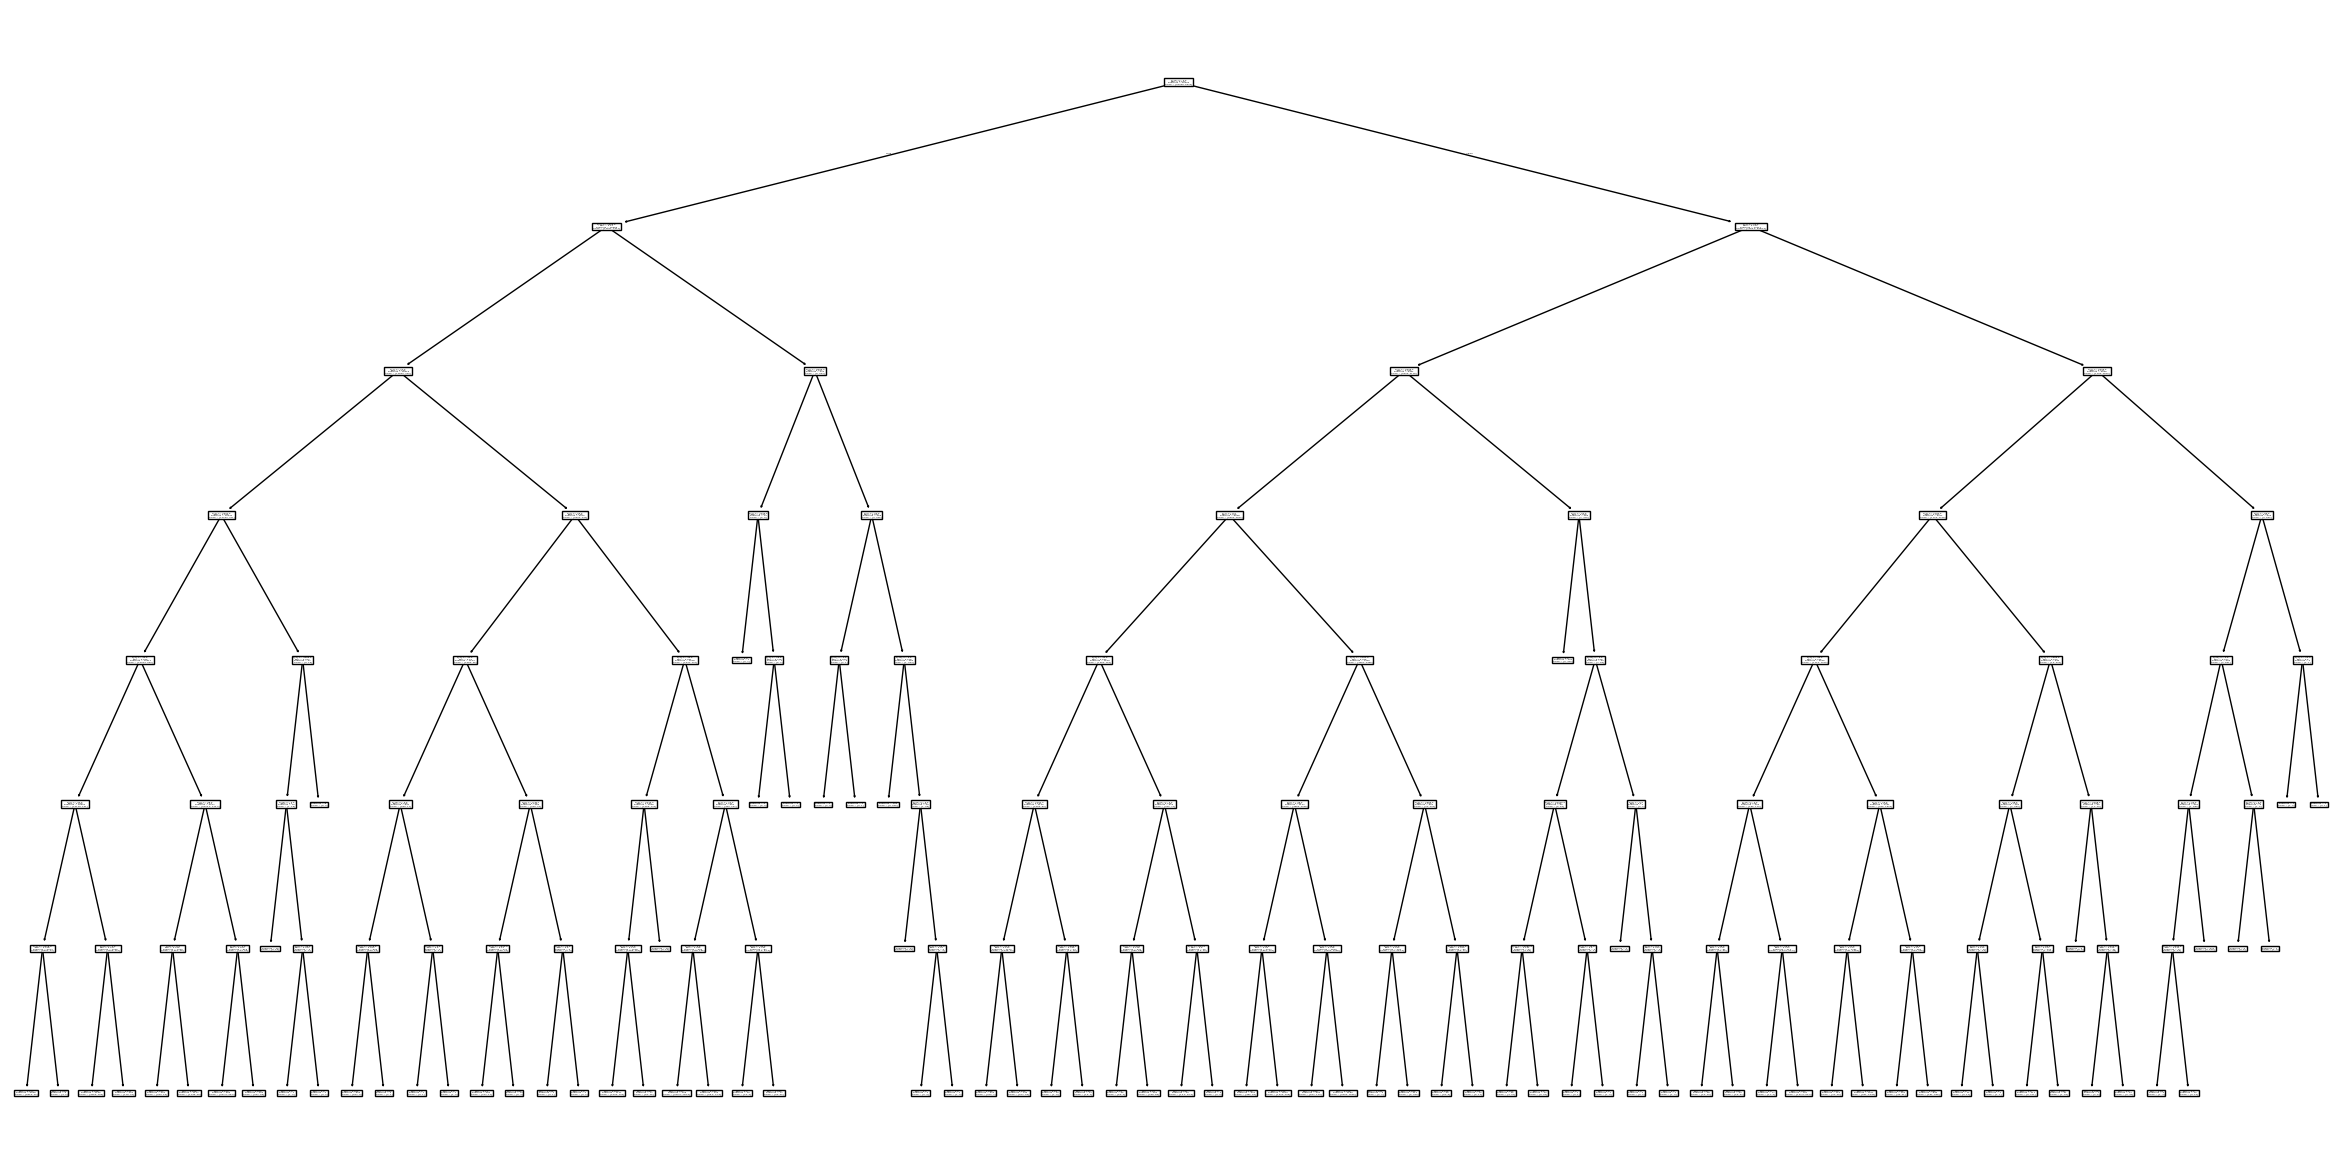

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (30,15))
plot_tree(model)                    # 현재 깊이가 7로 저장되어있다.
plt.show()

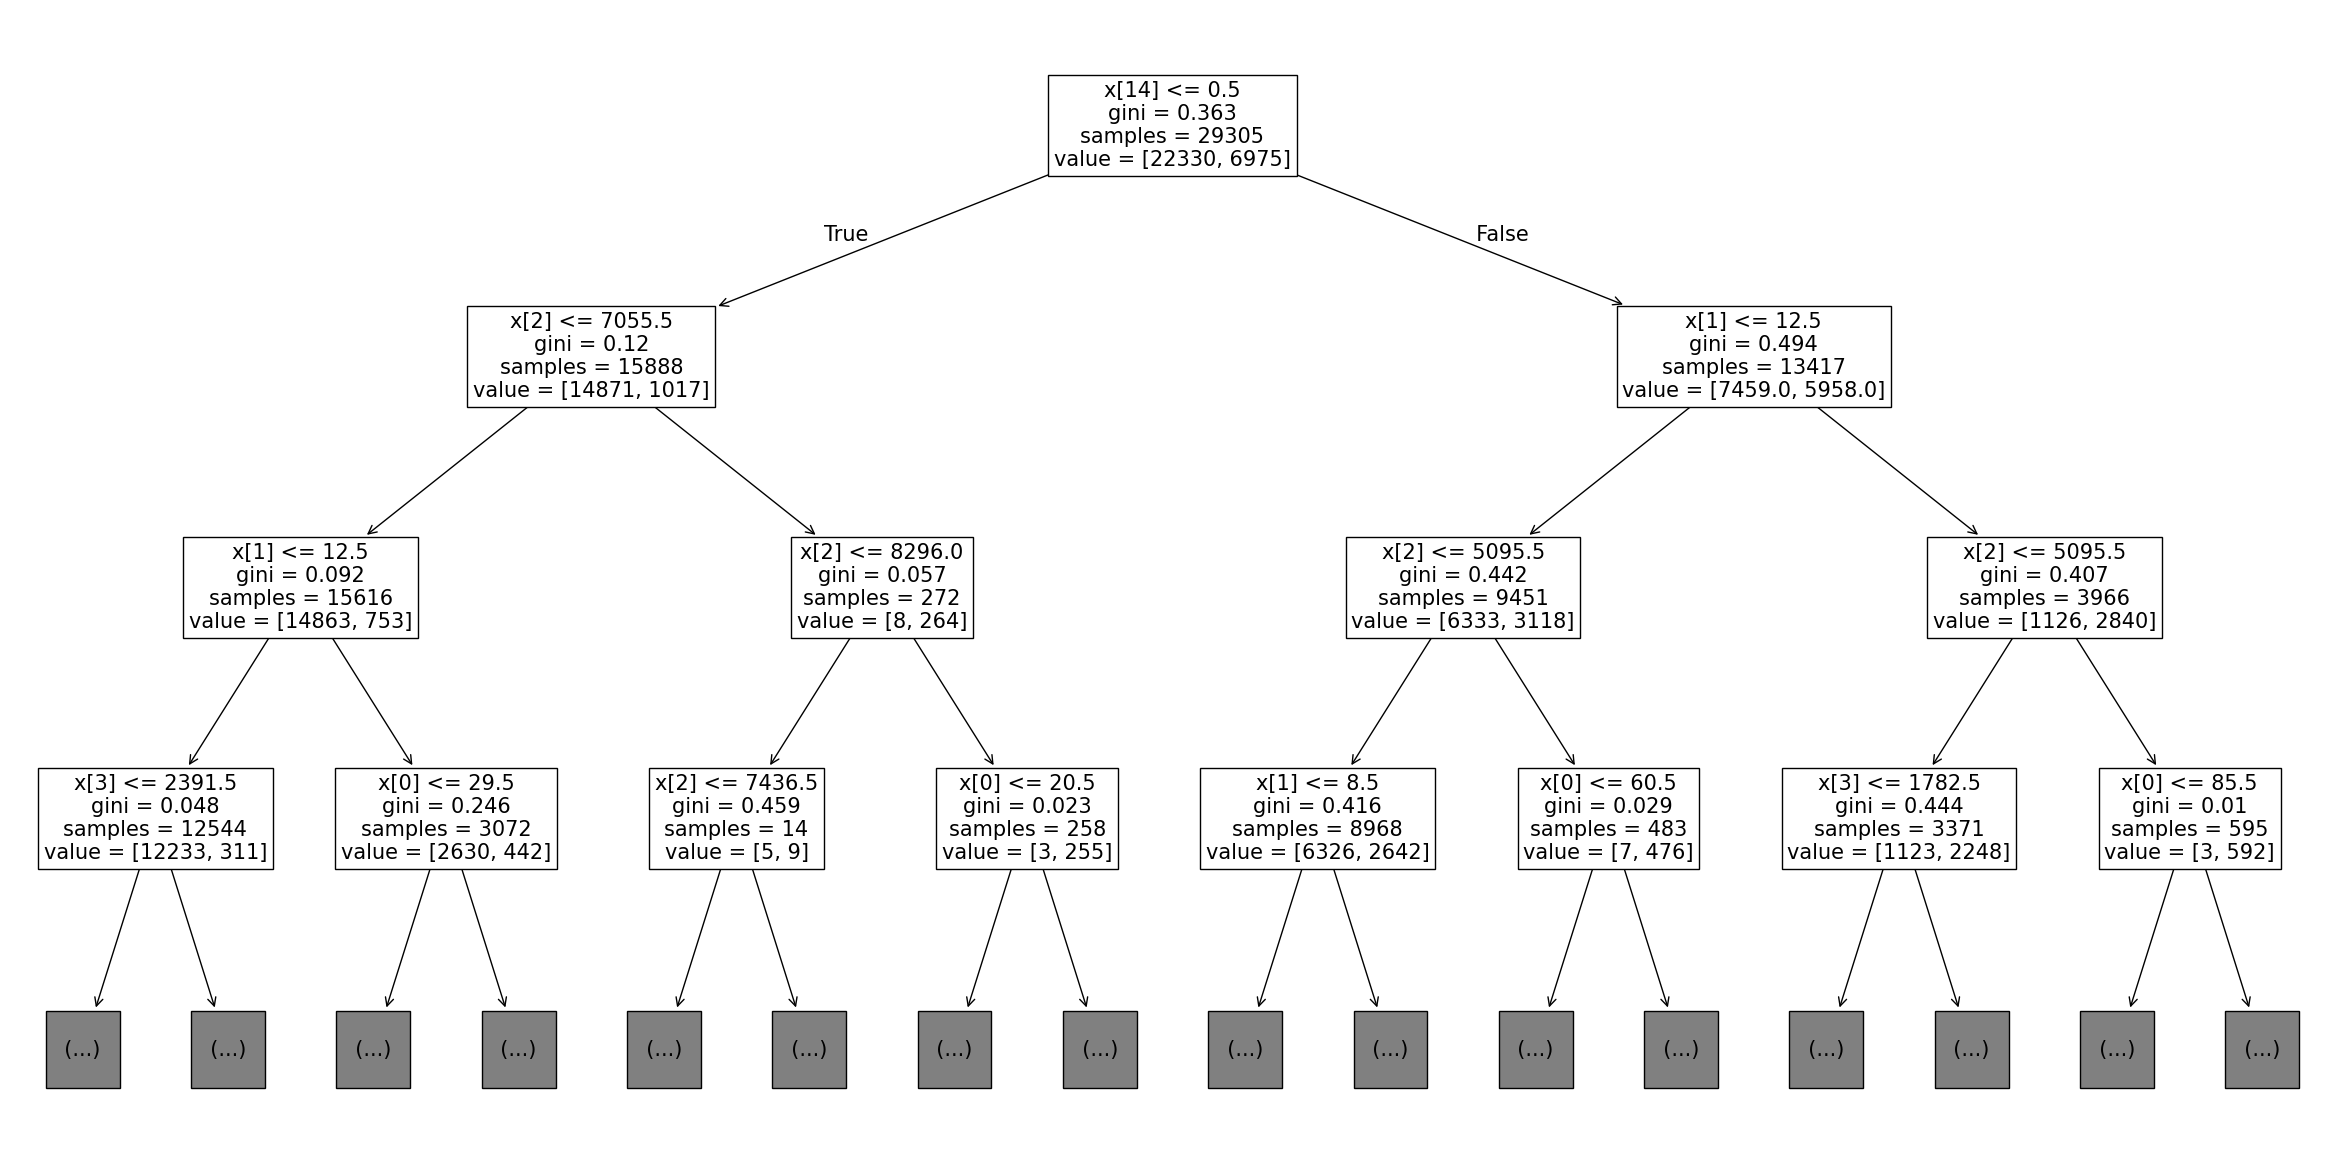

In [ ]:
plt.figure(figsize = (30,15))
plot_tree(model, max_depth=3, fontsize=15)  # 깊이가 7로 저장된 model에서 깊이 3까지만 트리 그래프로 출력
plt.show()

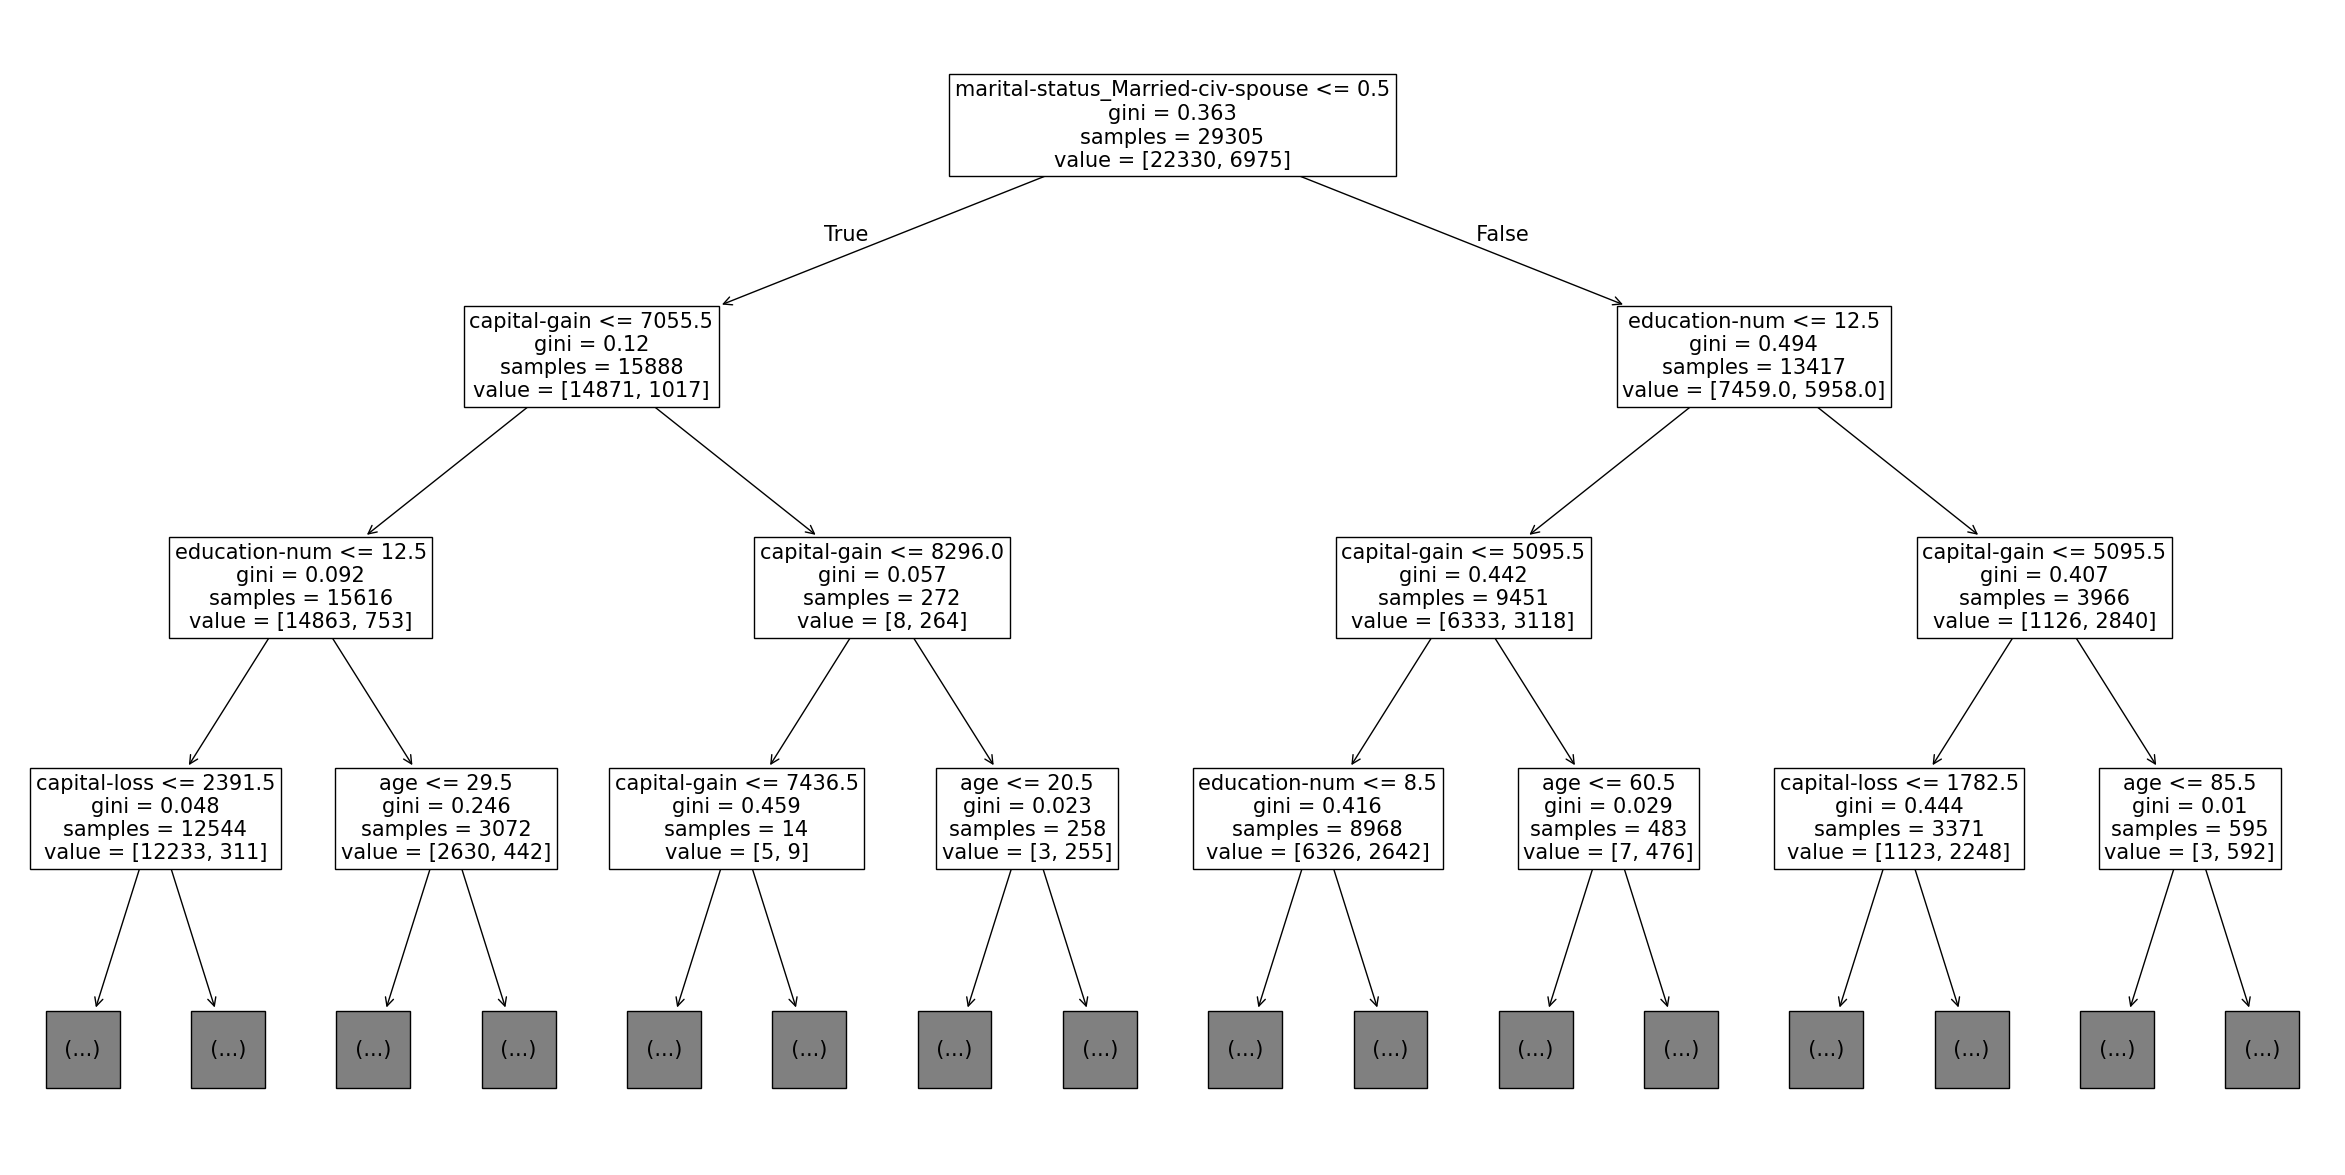

In [ ]:
plt.figure(figsize = (30,15))
plot_tree(model, max_depth=3, fontsize=15, feature_names = X_train.columns)  # 변수 이름을 추가
plt.show()

### 과제 : 타이타닉 데이터를 결정트리로 모델링하기

In [ ]:
titanic = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
df = pd.read_csv(titanic)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


## CH.9 랜덤 포레스트 : 중고차 가격 예측하기

- 결정 트리의 오버피팅문제를 완화하는 트리 모델
- 랜덤으로 무수히 생성된 무수히 많은 트리를 이용해 예측하는 모델 (앙상블)
- 장점 : 이상치에 거의 영향을 받지 않고, 선형/비선형 데이터에 상관없이 잘 작동한다.
- 단점 : 학습속도가 느린 편이고, 모델에 대한 해석이 어렵다.
- 유용한 곳
> - 종속변수가 연속형 데이터와 범주형 데이터 모두 사용가능
> - 이상치가 문제가 되는 성형 모델보다 좋은 대안.
> - 과적합 문제로 결정트리가 어려울 때, RF로 사용 가능

### 9.2 라이브러리 및 데이터 불러오기, 데이터 확인하기

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/car.csv'
data = pd.read_csv(file_url)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [60]:
data.isnull().sum()  # 결측치 확인

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [61]:
round(data.describe(include = 'all'), 2)  # 통계정보 확인

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.00,8128.00,8128.00,8128,8128,8128,8128,7907,7907,7913,7906,7907.00
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.80,638271.81,69819.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.42
std,NaN,4.04,806253.40,56550.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.96
min,NaN,1983.00,29999.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00
25%,NaN,2011.00,254999.00,35000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
50%,NaN,2015.00,450000.00,60000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
75%,NaN,2017.00,675000.00,98000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00


- 현재는 랜덤 포레스트 (트리 모형)을 사용할 것이기에, 따로 이상치 처리를 하지 않는다.

### 9.3 전처리 : 텍스트 데이터

In [63]:
# data['engine'].str.split()

,engine
0,"[1248, CC]"
1,"[1498, CC]"
2,"[1497, CC]"
3,"[1396, CC]"
4,"[1298, CC]"
...,...
8123,"[1197, CC]"
8124,"[1493, CC]"
8125,"[1248, CC]"
8126,"[1396, CC]"


In [64]:
# engine변수의 값을 str.split()을 이용하여 숫자와 문자로 분할
data['engine'].str.split(expand=True)

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [65]:
data[['engine', 'engine_unit']] = data['engine'].str.split(expand=True)  # 분리한 숫자와 문자를 다른 변수명으로 저장

In [66]:
data[['engine', 'engine_unit']]

,engine,engine_unit
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [67]:
data['engine'].head()  # engine 변수 확인 (dtype이 여전히 object이다.)

,engine
0,1248
1,1498
2,1497
3,1396
4,1298


In [68]:
data['engine'] = data['engine'].astype('float')  # engine 변수를 float형으로 변환
data['engine'].head()

,engine
0,1248.0
1,1498.0
2,1497.0
3,1396.0
4,1298.0


In [69]:
data['engine_unit'].unique()  # 고유값 확인

array(['CC', nan], dtype=object)

In [70]:
data.drop('engine_unit', axis = 1, inplace = True)   # 고유값이 전부 CC이니 변수 제거

- 9.3.2 max_power 변수 전처리하기

In [71]:
data['max_power'].head()

,max_power
0,74 bhp
1,103.52 bhp
2,78 bhp
3,90 bhp
4,88.2 bhp


In [72]:
data[['max_power', 'max_power_unit']] = data['max_power'].str.split(expand=True)  # max_power 변수 분리
data[['max_power', 'max_power_unit']]

,max_power,max_power_unit
0,74,bhp
1,103.52,bhp
2,78,bhp
3,90,bhp
4,88.2,bhp
...,...,...
8123,82.85,bhp
8124,110,bhp
8125,73.9,bhp
8126,70,bhp


In [20]:
data['max_power'] = data['max_power'].astype('float32') # 오류발생

ValueError: could not convert string to float: 'bhp'

In [73]:
data[data['max_power'] == 'bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796.0,bhp,NaN,8.0,None


In [74]:
# 오류를 해결하기 위한 함수(Try and Except 블록)
def isFloat(value):
  try:
    num = float(value)
    return num
  except ValueError:
    return np.nan

In [75]:
data['max_power'] = data['max_power'].apply(isFloat)

In [76]:
data['max_power_unit'].unique()   # 고유값 확인

array(['bhp', nan, None], dtype=object)

In [77]:
data.drop('max_power_unit', axis = 1, inplace = True)  # 고유값이 전부 bhp이니 변수 제거

- 9.3.3. mileage 변수 전처리하기


In [78]:
data[['mileage', 'mileage_unit']] = data['mileage'].str.split(expand=True) # 데이터 분리
data[['mileage', 'mileage_unit']]

,mileage,mileage_unit
0,23.4,kmpl
1,21.14,kmpl
2,17.7,kmpl
3,23.0,kmpl
4,16.1,kmpl
...,...,...
8123,18.5,kmpl
8124,16.8,kmpl
8125,19.3,kmpl
8126,23.57,kmpl


In [79]:
data['mileage'] = data['mileage'].astype('float32')  # dtype 변경

In [80]:
data['mileage_unit'].unique()

array(['kmpl', 'km/kg', nan], dtype=object)

- kmpl는 리터당 주행거리
- km/kg은 kg무게당 주행거리  
=> 연료에 따라 mileage의 단위가 달라진다.

In [81]:
data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

- 구글을 통해 연료에 대한 가격정보를 얻어보니 다음과 같다.
> - Petrol : 리터당 \$80.43
> - Diesel : 리터당 \$73.56  
> - LPG : 킬로그램당 \$40.85
> - CNG : 킬로그램당 \$44.23

In [82]:
def mile(x):
  if x['fuel'] == 'Petrol':
    return x['mileage'] / 80.43
  elif x['fuel'] == 'Diesel':
    return x['mileage'] / 73.56
  elif x['fuel'] == 'LPG':
    return x['mileage'] / 40.85
  else:
    return x['mileage'] / 44.23

In [83]:
data['mileage'] = data.apply(mile, axis=1) # mile 함수로 마일리지 수정

In [84]:
# mileage변수를 수정했으니 필요없는 mileage_unit 변수 삭제
data.drop('mileage_unit', axis = 1, inplace=True)

- 9.3.4 torque 변수 전처리

In [85]:
data['torque'] # torque변수 확인

,torque
0,190Nm@ 2000rpm
1,250Nm@ 1500-2500rpm
2,"12.7@ 2,700(kgm@ rpm)"
3,22.4 kgm at 1750-2750rpm
4,"11.5@ 4,500(kgm@ rpm)"
...,...
8123,113.7Nm@ 4000rpm
8124,"24@ 1,900-2,750(kgm@ rpm)"
8125,190Nm@ 2000rpm
8126,140Nm@ 1800-3000rpm


In [86]:
# 대소문자를 동일하게 변환하기
data['torque'] = data['torque'].str.upper()

In [87]:
# 전체를 대문자 처리했으나 단위를 구분하기 위해 함수 생성
def torque_unit(x):
  if 'NM' in str(x):
    return 'Nm'
  elif 'KGM' in str(x):
    return 'kgm'

In [88]:
# 위에서 만든 함수 적용하여 단위가 포함된 변수 생성
data['torque_unit'] = data['torque'].apply(torque_unit)
data['torque_unit']

,torque_unit
0,Nm
1,Nm
2,kgm
3,kgm
4,kgm
...,...
8123,Nm
8124,kgm
8125,Nm
8126,Nm


In [89]:
data['torque_unit'].unique() # 고유값 확인

array(['Nm', 'kgm', None], dtype=object)

In [90]:
# torque_unit이 null값인 torque변수 고유값 확인
data[data['torque_unit'].isna()]['torque'].unique()

array([nan, '250@ 1250-5000RPM', '510@ 1600-2400', '110(11.2)@ 4800',
       '210 / 1900'], dtype=object)

In [91]:
# torque_unit의 결측치를 Nm으로 대체하여 단위 맞추기
data['torque_unit'].fillna('Nm', inplace=True)

In [92]:
# 인덱싱을 이용하여 torque변수의 숫자부분을 분리하기
def split_num(x):
  x = str(x)
  for i,j in enumerate(x):
    if j not in '0123456789.':
      cut = i
      break
  return x[:cut]

In [93]:
# 함수 적용하여 torque 변수 업데이트
data['torque'] = data['torque'].apply(split_num)
data['torque']

,torque
0,190
1,250
2,12.7
3,22.4
4,11.5
...,...
8123,113.7
8124,24
8125,190
8126,140


In [94]:
data['torque'] = data['torque'].astype('float64')  # 변수값에 공백이 들어가 있는 형태라 오류발생

ValueError: could not convert string to float: ''

In [95]:
data['torque'] = data['torque'].replace('',np.nan)  # 공백문자를 nan으로 대체

In [96]:
data['torque'] = data['torque'].astype('float64') # torque 변수를 숫자형으로 변환

In [97]:
data['torque'].head()

,torque
0,190.0
1,250.0
2,12.7
3,22.4
4,11.5


In [98]:
# torque의 단위인 Nm과 kgm 단위에 따른 정규화 진행
def torque_trans(x):
  if x['torque_unit'] == 'kgm':
    return x['torque'] * 9.8066
  else:
    return x['torque']

In [99]:
# torque_trans 함수 적용
data['torque'] = data.apply(torque_trans, axis=1)

In [100]:
# torque 단위 변수인 torque_unit 변수 제거
data.drop('torque_unit', axis = 1, inplace=True)

In [101]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.318108,1248.0,74.00,190.00000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.287384,1498.0,103.52,250.00000,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.220067,1497.0,78.00,124.54382,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.312670,1396.0,90.00,219.66784,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.200174,1298.0,88.20,112.77590,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,0.230014,1197.0,82.85,113.70000,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,0.228385,1493.0,110.00,235.35840,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,0.262371,1248.0,73.90,190.00000,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,0.320419,1396.0,70.00,140.00000,5.0


- 9.3.5 name 변수 전처리

In [102]:
# name 변수를 split 진행
data['name'] = data['name'].str.split(expand=True)[0]

In [103]:
data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [104]:
# name의 고유값중 Land를 Land Rover로 변경 (제대로 된 브랜드명이 Land Rover임)
data['name'] = data['name'].replace('Land', 'Land Rover')

### 9.4 전처리 : 결측치 처리와 더미 변수

In [110]:
print(data.isnull().sum(), '\n', data.isnull().mean())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
dtype: int64 
 name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026575
torque           0.027313
seats            0.027190
dtype: float64


In [111]:
# 결측치가 데이터에 약 2% 정도이니 dropna로 결측치 처리 진행
data.dropna(inplace=True)
len(data)

7906

In [112]:
# 더미변수로 변환하여 모델링 준비
data = pd.get_dummies(data, columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
data

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.318108,1248.0,74.00,190.00000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
1,2014,370000,120000,0.287384,1498.0,103.52,250.00000,5.0,False,False,...,True,False,False,True,False,True,False,True,False,False
2,2006,158000,140000,0.220067,1497.0,78.00,124.54382,5.0,False,False,...,False,False,True,True,False,True,False,False,False,True
3,2010,225000,127000,0.312670,1396.0,90.00,219.66784,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
4,2007,130000,120000,0.200174,1298.0,88.20,112.77590,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,0.230014,1197.0,82.85,113.70000,5.0,False,False,...,False,False,True,True,False,True,False,False,False,False
8124,2007,135000,119000,0.228385,1493.0,110.00,235.35840,5.0,False,False,...,True,False,False,True,False,True,True,False,False,False
8125,2009,382000,120000,0.262371,1248.0,73.90,190.00000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False
8126,2013,290000,25000,0.320419,1396.0,70.00,140.00000,5.0,False,False,...,True,False,False,True,False,True,False,False,False,False


### 9.5 모델링 및 평가하기

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('selling_price', axis = 1), data['selling_price'], test_size = 0.2, random_state = 100)

In [115]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=100)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error
print("train_rmse:", mean_squared_error(y_train, train_pred) ** 0.5, "test_rmse:", mean_squared_error(y_test, test_pred) ** 0.5)

train_rmse: 53531.41548125947 test_rmse: 131855.18391308116


### 9.6 이해하기 : k-fold CV

- 교차검증은 모델의 예측력을 더 안정적으로 평가하기 위해 사용한다.
- 계속 랜덤으로 변하는 이러한 작은 오차들을 고려하여 평가하는 방법이 교차검증이다.
- K개의 셋으로 쪼개어 각 셋마다의 훈련과 시험으로 나누어 반복적으로 모델링을 수행하여 최종 평가값을 도출하는 방식이다.

In [117]:
from sklearn.model_selection import KFold
data.reset_index(drop = True, inplace=True)
kf = KFold(n_splits=5)
X = data.drop('selling_price', axis=1)
y = data['selling_price']

In [119]:
# KFold가 적용된 kf의 분할된 모델을 출력
for i,j in kf.split(X):
  print(i,j)

[1582 1583 1584 ... 7903 7904 7905] [   0    1    2 ... 1579 1580 1581]
[   0    1    2 ... 7903 7904 7905] [1582 1583 1584 ... 3160 3161 3162]
[   0    1    2 ... 7903 7904 7905] [3163 3164 3165 ... 4741 4742 4743]
[   0    1    2 ... 7903 7904 7905] [4744 4745 4746 ... 6322 6323 6324]
[   0    1    2 ... 6322 6323 6324] [6325 6326 6327 ... 7903 7904 7905]


In [120]:
# 각 데이터 셋에 교차검증을 적용하기
train_rmse_total = []
test_rmse_total = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = RandomForestRegressor(random_state=100)
  model.fit(X_train, y_train)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_rmse = mean_squared_error(y_train, train_pred) ** 0.5
  test_rmse = mean_squared_error(y_test, test_pred) ** 0.5

  train_rmse_total.append(train_rmse)
  test_rmse_total.append(test_rmse)

In [121]:
train_rmse_total

[50825.5556350298,
 58854.04054344074,
 57904.19615940739,
 56218.23740006373,
 58967.150857632456]

In [123]:
print("train_rmse:", sum(train_rmse_total)/5, "test_rmse:", sum(test_rmse_total)/5)

train_rmse: 56553.836119114814 test_rmse: 142936.5891824404


### 9.7 이해하기 : 랜덤 포레스트

- 여러 트리를 활용하여 최종 모델을 선택한다. 따라서 오버피팅을 낮출 수 있다.
- 일부 데이터만 사용하면 전체 데이터를 사용한 결과보다 예측력이 떨어질 수 있으나, 모델이 모여 중윗값을 찾아내면 오버피팅을 막는데 효율적이다.

### 9.8 하이퍼파라미터 튜닝

- n_estimators : 트리의 개수 (기본값 : 100)
- max_depth : 트리의 최대 깊이 (기본값 : 가장 깊게)
- min_samples_split : 노드 데이터 수를 기준으로 판단하여 지정된 수보다 적으면 더이상 분류를 진행하지 않음 (기본값 : 2)
- min_samples_leaf : 분리된 노드의 데이터에 최소로 존재하는 데이터 (기본값 : 1)
- n_jobs : CPU 코어의 수


In [124]:
train_rmse_total = []
test_rmse_total = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  model = RandomForestRegressor(n_estimators=300, max_depth = 50, min_samples_split = 5,
                                min_samples_leaf = 1, n_jobs = -1, random_state=100)
  model.fit(X_train, y_train)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_rmse = mean_squared_error(y_train, train_pred) ** 0.5
  test_rmse = mean_squared_error(y_test, test_pred) ** 0.5

  train_rmse_total.append(train_rmse)
  test_rmse_total.append(test_rmse)

In [125]:
print("train_rmse:", sum(train_rmse_total)/5, "test_rmse:", sum(test_rmse_total)/5)

train_rmse: 66762.84568886801 test_rmse: 142205.83441414658


- 기존의 rmse값인 (56,553과 142,936)보다 train은 높아지고 test는 낮아짐  
=> 이는 오버피팅이 줄어들어 새 데이터를 예측하기 더 좋아진 모델이라 할 수 있다.

## 궁금한 점
- 7장 : 나이브 베이즈의 가정조건인 모든 독립변수가 각각 독립적이라는 전제는 현실에서 일어나기 힘든 조건임에도 나이브 베이즈가 충분히 사용되고 성능이 나쁘지 않은 이유는??
- 8장 : 결정 트리는 예측력보다는 설명력이 중요한 문제에서 주로 사용되는데, 그렇다면 예측력과 설명력 사이에서 어느 정도의 차이가 발생해야 '설명력이 더 중요하다'라고 판단할 수 있을까??
- 9장 : 랜덤포레스트는 흔히 블랙박스 모델로 불리는데, 해석성이 떨어지는 단점을 보안하기 위해 어떠한 방법을 사용할 수 있을까??